# Trainer notes - Python Charmers

Copyright (c) 2018 Python Charmers. All rights reserved. Please do not distribute.

# Altair in more depth
## Chart objects and their properties

In [1]:
import altair as alt
import pandas as pd
import numpy as np
from vega_datasets import data as vgdata

In [9]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [25]:
x = np.arange(4)
y = x**2

In [26]:
data = pd.DataFrame({'col1': x, 'col2': y})

In [27]:
data

,col1,col2
0,0,0
1,1,1
2,2,4
3,3,9


Here is a very simple chart object:

In [28]:
base = alt.Chart(data, mark='line')

In [29]:
base.to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'values': [{'col1': 0, 'col2': 0},
   {'col1': 1, 'col2': 1},
   {'col1': 2, 'col2': 4},
   {'col1': 3, 'col2': 9}]},
 'mark': 'line',
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json'}

In [30]:
chart = base.encode(
    x='col1',
    y='col2'
)

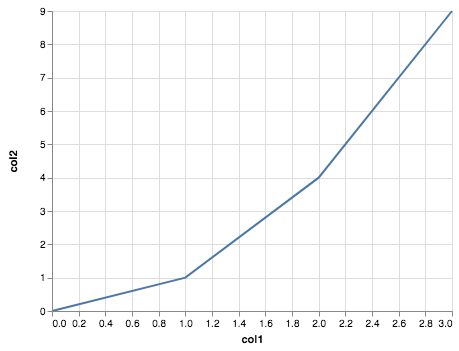

In [31]:
chart

This can be constructed more directly like this:

In [32]:
chart = alt.Chart(data).mark_line().encode(
     x='col1',
     y='col2'
)

In [33]:
from pprint import pprint
pprint(chart.to_dict())

{'$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json',
 'config': {'view': {'height': 300, 'width': 400}},
 'data': {'values': [{'col1': 0, 'col2': 0},
                     {'col1': 1, 'col2': 1},
                     {'col1': 2, 'col2': 4},
                     {'col1': 3, 'col2': 9}]},
 'encoding': {'x': {'field': 'col1', 'type': 'quantitative'},
              'y': {'field': 'col2', 'type': 'quantitative'}},
 'mark': 'line'}


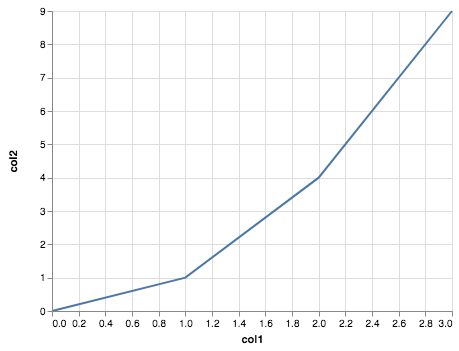

In [34]:
chart

In [35]:
widechart = chart.properties(width=600)

In [36]:
widechart.to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'values': [{'col1': 0, 'col2': 0},
   {'col1': 1, 'col2': 1},
   {'col1': 2, 'col2': 4},
   {'col1': 3, 'col2': 9}]},
 'mark': 'line',
 'encoding': {'x': {'type': 'quantitative', 'field': 'col1'},
  'y': {'type': 'quantitative', 'field': 'col2'}},
 'width': 600,
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json'}

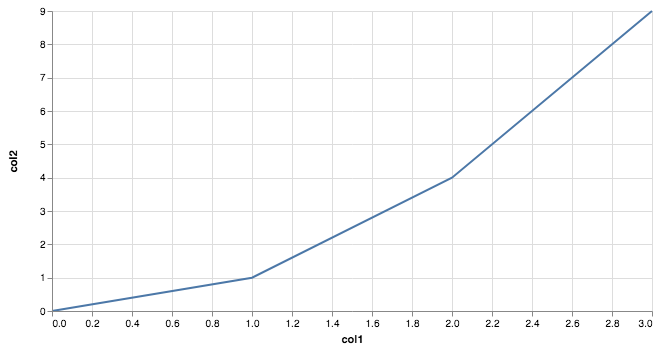

In [37]:
widechart

## Marks

Attributes of chart objects like `mark` can be modified:

In [38]:
chart.mark = 'area'

In [39]:
chart.to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'values': [{'col1': 0, 'col2': 0},
   {'col1': 1, 'col2': 1},
   {'col1': 2, 'col2': 4},
   {'col1': 3, 'col2': 9}]},
 'mark': 'area',
 'encoding': {'x': {'type': 'quantitative', 'field': 'col1'},
  'y': {'type': 'quantitative', 'field': 'col2'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json'}

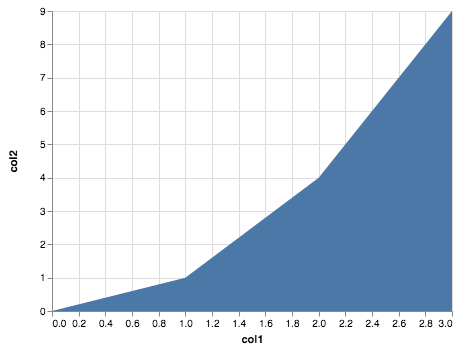

In [40]:
chart

Charts are normally constructed with the appropriate mark directly as follows:

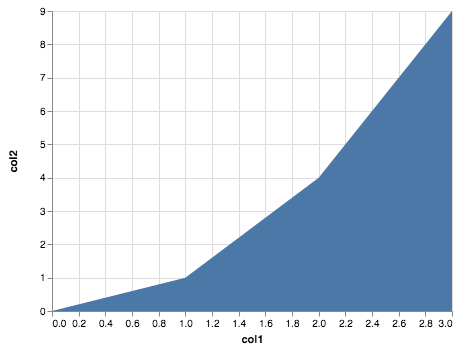

In [41]:
alt.Chart(data).mark_area().encode(
     x='col1',
     y='col2'
)

In [42]:
mark_options = [thing for thing in dir(alt.Chart) if thing.startswith('mark_')]
mark_options

['mark_area',
 'mark_bar',
 'mark_circle',
 'mark_geoshape',
 'mark_line',
 'mark_point',
 'mark_rect',
 'mark_rule',
 'mark_square',
 'mark_text',
 'mark_tick',
 'mark_trail']

#### Exercise: try changing the `mark_xyz` call to some of the above options

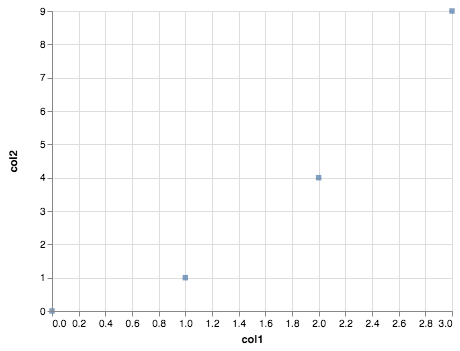

In [43]:
# For example
alt.Chart(data).mark_square().encode(
     x='col1',
     y='col2'
)

In [44]:
from ipywidgets import interact

In [45]:
@interact
def plot_with_mark_option(mark_option=mark_options):
    chart = getattr(alt.Chart(data), mark_option)().encode(
       x='col1',
       y='col2'
    )
    return chart

interactive(children=(Dropdown(description='mark_option', options=('mark_area', 'mark_bar', 'mark_circle', 'ma…

## Properties of charts

Properties of charts like the `width` and `height` can be set with the `alt.Chart.properties` method like this:

In [315]:
widechart = linechart.properties(width=600)

In [316]:
widechart.to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'url': 'altair-data-1fbca450ae86db7ace905f7230289220.csv',
  'format': {'type': 'csv'}},
 'mark': 'line',
 'encoding': {'x': {'type': 'quantitative', 'field': 'x'},
  'y': {'type': 'quantitative', 'field': 'y'}},
 'width': 600,
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json'}

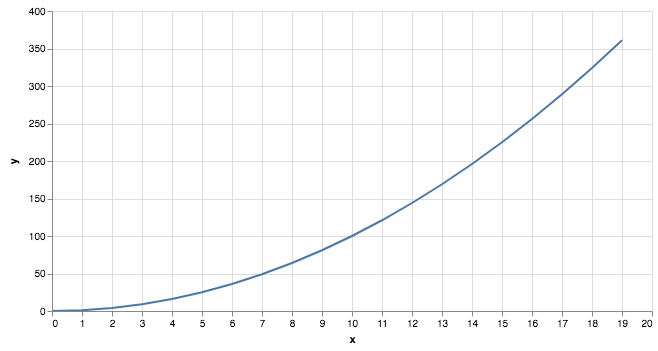

In [317]:
widechart

#### Exercise: other attributes of Altair charts

Here is a summary of all the public attributes available on Altair charts:

In [ ]:
print([attrib for attrib in dir(alt.Chart) if not attrib.startswith('__')])

Look at the help on `alt.Chart` in detail using:

In [ ]:
alt.Chart?

#### Exercise: read about other properties like `width` and try them out

The Vega-Lite specs describe these: https://vega.github.io/vega-lite/docs/spec.html#top-level-specifications


## Serializing data for Altair

### Realistic datasets (more than 5000 rows) ...

Altair imposes a default limit of 5000 rows for performance when passing data as Pandas DataFrames. This is because by default the entire dataset is embedded into the chart (e.g. in the Jupyter notebook) every time a plot is created.

This section explains how to work around this and the underlying issues.

In [20]:
cars = vgdata.cars()
cars[:2]

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01


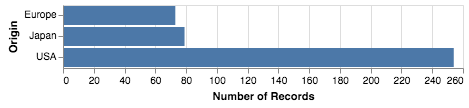

In [21]:
chart = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin'
)
chart

Altair can read JSON files directly. However, by default the `to_json()` method does not serialize the data in a way that Altair can read:

In [39]:
cars.to_json('cars_broken.json')

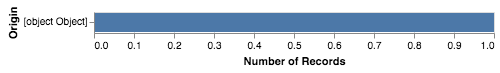

In [40]:
chart = alt.Chart('cars_broken.json').mark_bar().encode(
    x='count()',
    y='Origin:N'
)
chart

In [113]:
import json
json.load(open('cars_broken.json'))

{'Acceleration': {'0': 12.0, '1': 11.5, '2': 11.0},
 'Cylinders': {'0': 8, '1': 8, '2': 8},
 'Displacement': {'0': 307.0, '1': 350.0, '2': 318.0},
 'Horsepower': {'0': 130.0, '1': 165.0, '2': 150.0},
 'Miles_per_Gallon': {'0': 18.0, '1': 15.0, '2': 18.0},
 'Name': {'0': 'chevrolet chevelle malibu',
  '1': 'buick skylark 320',
  '2': 'plymouth satellite'},
 'Origin': {'0': 'USA', '1': 'USA', '2': 'USA'},
 'Weight_in_lbs': {'0': 3504, '1': 3693, '2': 3436},
 'Year': {'0': 0, '1': 0, '2': 0}}

Using the `orient='records'` keyword argument to `to_json()` does work:

In [41]:
cars.to_json('cars.json', orient='records')

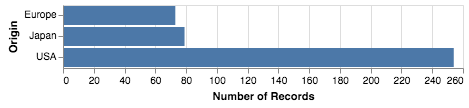

In [42]:
chart = alt.Chart('cars.json').mark_bar().encode(
    x='count()',
    y='Origin:N'
)
chart

In [45]:
import json
json.load(open('cars.json'))[:2]

[{'Acceleration': 12.0,
  'Cylinders': 8,
  'Displacement': 307.0,
  'Horsepower': 130.0,
  'Miles_per_Gallon': 18.0,
  'Name': 'chevrolet chevelle malibu',
  'Origin': 'USA',
  'Weight_in_lbs': 3504,
  'Year': 0},
 {'Acceleration': 11.5,
  'Cylinders': 8,
  'Displacement': 350.0,
  'Horsepower': 165.0,
  'Miles_per_Gallon': 15.0,
  'Name': 'buick skylark 320',
  'Origin': 'USA',
  'Weight_in_lbs': 3693,
  'Year': 0}]

Altair also accepts CSV files:

In [48]:
cars.to_csv('cars.csv')

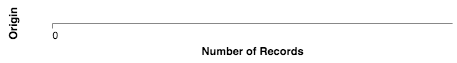

In [18]:
chart = alt.Chart('cars.csv').mark_bar().encode(
    x='count()',
    y='Origin:N'
)
chart

### Automatically saving DataFrames as JSON

If we want to plot only a subset of the rows, using the method above we'd need to save the subset manually as a new JSON file.

We can configure Altair to serialize data to disk automatically so it's not included in the notebook with every chart:

In [9]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

Now, for example:

In [10]:
airports = pd.read_csv('/data/airports.csv')

In [11]:
# This exceeds the default of 5000 rows:
subset = airports.sample(5100)

In [14]:
chart2 = alt.Chart(subset).mark_circle().encode(
    x = 'Longitude:Q',
    y = 'Latitude:Q',
)

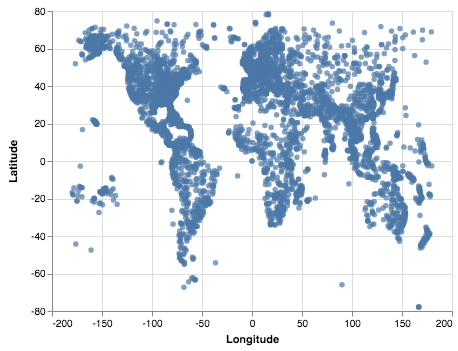

In [15]:
chart2

## Saving charts to disk

Saving to HTML is easy:

In [87]:
chart.save('barchart.html')

Try opening the HTML now in your browser.

In [88]:
# Hint: on macOS, you can open the HTML file in your default browser like this:
!open barchart.html

Saving to SVG or PNG is also supported but requires the Selenium package:

In [ ]:
!pip install selenium

In [16]:
import selenium

Note that you may need to restart your IPython kernel for Altair to be able to import the new package.

Now these work:

In [22]:
chart.save('barchart.svg')

In [23]:
chart.save('barchart.png')

In [24]:
# To display the file sizes on macOS or Linux:
!du -sch barchart.*

8.0K	barchart.png
 12K	barchart.svg
 20K	total


### Converting Altair charts to and from dictionaries

Altair charts can be exported to Python dictionaries (or JSON) and re-created from appropriately formatted dictionaries:

In [62]:
airports = pd.read_csv('/data/airports.csv.gz')

In [64]:
airports[:2]

,Airport_ID,Name,City,Country,IATA_FAA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_db_time_zone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby


In [65]:
len(airports)

8105

In [73]:
data = alt.Chart(airports).mark_circle().encode(
    x='Longitude',
    y='Latitude'
).to_dict()

In [74]:
data

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'url': 'altair-data-5b1650b1c81e72624653273e2316ff24.json',
  'format': {'type': 'json'}},
 'mark': 'circle',
 'encoding': {'x': {'type': 'quantitative', 'field': 'Longitude'},
  'y': {'type': 'quantitative', 'field': 'Latitude'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json'}

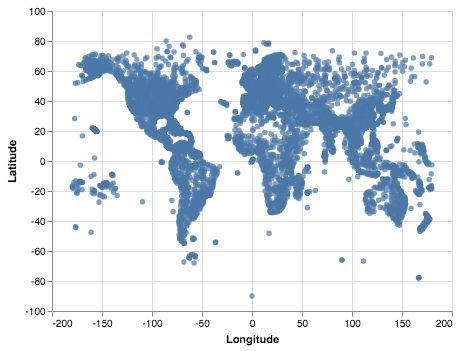

In [75]:
alt.Chart.from_dict(data)

The data can also be specified later:

In [45]:
url = 'https://raw.githubusercontent.com/ajdapretnar/datasets/master/data/global_airports.csv'
world_airports = pd.read_csv(url)

In [77]:
chart = alt.Chart().mark_bar().encode(
    x='count()',
    y='country:N'
)

In [79]:
# data is a required property, so this fails:
# chart.to_dict()

In [80]:
chart.data = url

In [81]:
# Now this works:
chart.to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'url': 'https://raw.githubusercontent.com/ajdapretnar/datasets/master/data/global_airports.csv'},
 'mark': 'bar',
 'encoding': {'x': {'type': 'quantitative', 'aggregate': 'count'},
  'y': {'type': 'nominal', 'field': 'country'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json'}

## Browser limitations with local data sources

The following serialized data sources are supported by Altair using Chrome:

- URLs (http://some_url.com/data.json)
- files in the current directory (e.g. `data.json` or `data.csv`)

However, Chrome has security permissions to block access to files in other directories, so passing `/other/directory/data.json` etc. does not work:

In [59]:
# No data displayed:
chart_no_data = alt.Chart('/data/global_airports.csv').mark_bar().encode(
    x='count()',
    y='country:N'
)
chart_no_data.to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'url': '/data/global_airports.csv'},
 'mark': 'bar',
 'encoding': {'x': {'type': 'quantitative', 'aggregate': 'count'},
  'y': {'type': 'nominal', 'field': 'country'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json'}

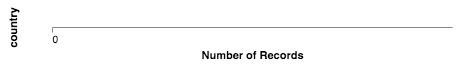

In [60]:
chart_no_data

In [54]:
!cp /data/global_airports.csv ./

Now the following works. Notice that the only difference is the path to the CSV file:

In [139]:
# Now it works:
chart = alt.Chart('global_airports.csv').mark_bar().encode(
    y='count()',
    x='country:N'
)

## Other ways of composing Altair charts

Try this:

In [112]:
encodings = dict(x='col1', y='col2')

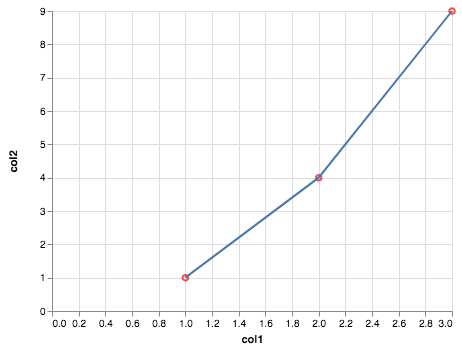

In [123]:
base2 = base.encode(**encodings)
chart = base2.mark_point(color='red') + base2.mark_line()
chart

### Alternate ways of specifying encodings

In [87]:
encodings = dict(
    x='count()',
    y='location:N'
)

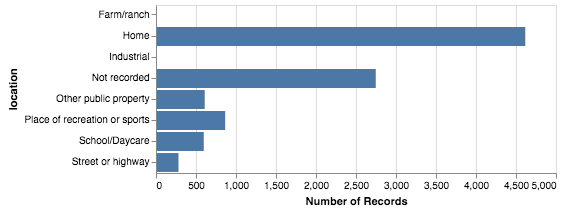

In [140]:
alt.Chart('accidents.csv').mark_bar().encode(**encodings)

### Other objects on Altair charts

In [ ]:
# See the help using:
alt.Chart?

In [30]:
print(dir(alt.Chart))

['__add__', '__and__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_transform', '_class_is_valid_at_instantiation', '_default_wrapper_classes', '_repr_mimebundle_', '_rootschema', '_schema', '_set_resolve', 'add_selection', 'configure', 'configure_area', 'configure_axis', 'configure_axisBand', 'configure_axisBottom', 'configure_axisLeft', 'configure_axisRight', 'configure_axisTop', 'configure_axisX', 'configure_axisY', 'configure_bar', 'configure_circle', 'configure_geoshape', 'configure_legend', 'configure_line', 'configure_mark', 'configure_point', 'configure_projection', 'configure_range', 'configure_rect', 'configure_rule', 'con

## Data types: nominal, ordinal, quantitative, temporal

The Altair docs describe data types as follows:

> The details of any mapping depend on the type of the data. Altair recognizes four main data types:

<table border="1" class="docutils">
<colgroup>
<col width="16%" />
<col width="19%" />
<col width="65%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Data Type</th>
<th class="head">Shorthand Code</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>quantitative</td>
<td><code class="docutils literal"><span class="pre">Q</span></code></td>
<td>a continuous real-valued quantity</td>
</tr>
<tr class="row-odd"><td>ordinal</td>
<td><code class="docutils literal"><span class="pre">O</span></code></td>
<td>a discrete ordered quantity</td>
</tr>
<tr class="row-even"><td>nominal</td>
<td><code class="docutils literal"><span class="pre">N</span></code></td>
<td>a discrete unordered category</td>
</tr>
<tr class="row-odd"><td>temporal</td>
<td><code class="docutils literal"><span class="pre">T</span></code></td>
<td>a time or date value</td>
</tr>
</tbody>
</table>

> If types are not specified for data input as a DataFrame, Altair defaults to quantitative for any numeric data, temporal for date/time data, and nominal for string data, but be aware that these defaults are by no means always the correct choice!

> The types can either be expressed in a long-form using the channel encoding classes such as X and Y, or in short-form using the Shorthand Syntax discussed below. For example, the following two methods of specifying the type will lead to identical plots:

In [160]:
cars[:3]

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01


In [26]:
chart1 = alt.Chart(cars).mark_point().encode(
    x='Acceleration:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N'
)

In [27]:
chart2 = alt.Chart(cars).mark_point().encode(
    alt.X('Acceleration', type='quantitative'),
    alt.Y('Miles_per_Gallon', type='quantitative'),
    alt.Color('Origin', type='nominal')
)

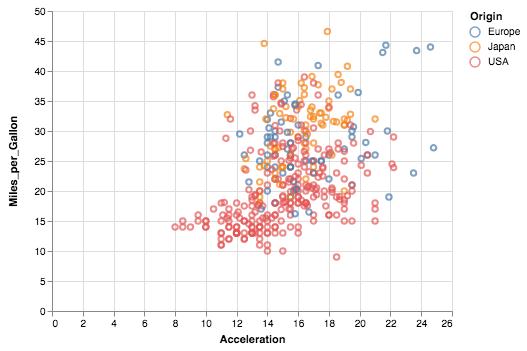

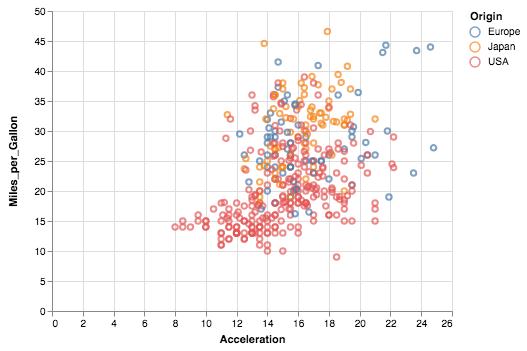

In [28]:
chart2

### More examples

Here are some more examples of different data types:

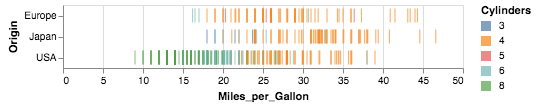

In [163]:
alt.Chart('cars.json').mark_tick().encode(
    x='Miles_per_Gallon:Q',
    y='Origin:N',
    color='Cylinders:N'
)

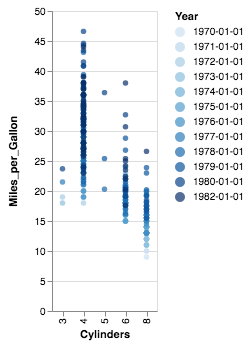

In [10]:
alt.Chart(cars).mark_circle().encode(
    y='Miles_per_Gallon',
    x='Cylinders:O',
    color = 'Year:O'
).interactive()

#### Exercise: plot the fuel efficiency (mpg) of the cars data against numbers of cylinders in various other ways, trying different combinations of encoding channels and data types

### Colour channel

Above showed how the color channel works. Here is another example of grouping by color:

In [21]:
airports = pd.read_csv('/data/airports.csv')

In [3]:
len(airports)

8105

In [40]:
countries = ['United States', 'Australia', 'Germany', 'China', 'France', 'Greece']

In [41]:
subset = airports[airports['Country'].isin(countries)]

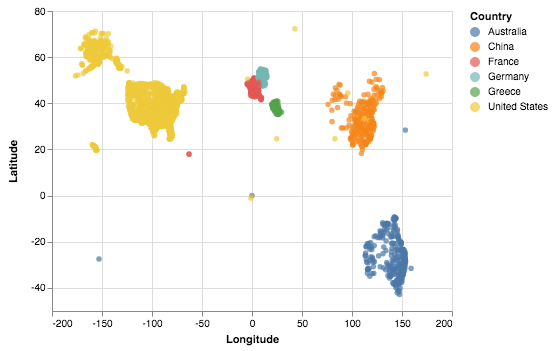

In [42]:
alt.Chart(subset).mark_circle().encode(
    x = 'Longitude:Q',
    y = 'Latitude:Q',
    color = 'Country:N'
).interactive()

## Specifying fixed values

Normally an encoding refers to a **column** in data source. To pass a specific value, using `alt.value` like this:

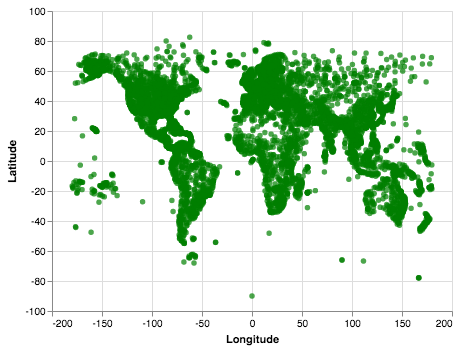

In [34]:
alt.Chart(airports).mark_circle().encode(
    x = 'Longitude:Q',
    y = 'Latitude:Q',
    color = alt.value('green')
)

Here is another example:

In [36]:
iris = vgdata.iris()
iris[:2]

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa


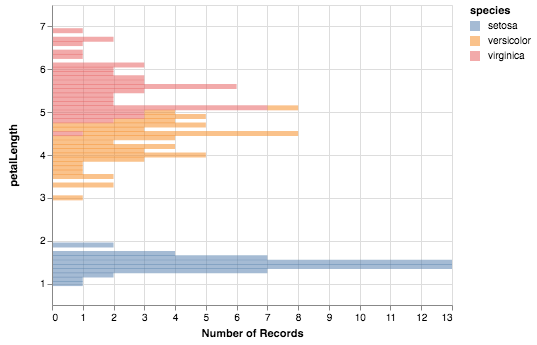

In [37]:
alt.Chart(iris).mark_bar().encode(
    x='count()',
    y='petalLength',
    color='species',
    opacity=alt.value(0.5)
)

## Large datasets (e.g. 1m rows)

Here is a worked example with 1 million rows:

In [29]:
import numpy as np

n = 10**6

times = pd.date_range(start='2018-01-01', freq='ms', periods=n)
random_time_series = pd.Series(np.random.normal(size=n),
                               index=times)

In [113]:
random_time_series[:3]

2018-01-01 00:00:00.000    0.048437
2018-01-01 00:00:00.001   -0.564317
2018-01-01 00:00:00.002   -0.059700
Freq: L, dtype: float64

In [114]:
len(random_time_series)

1000000

In [116]:
%matplotlib inline

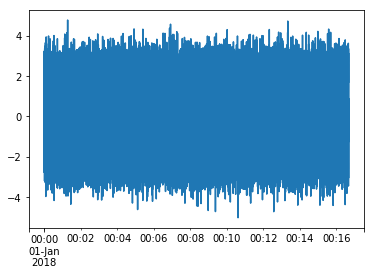

In [117]:
random_time_series.plot()

In [120]:
random_df = random_time_series.reset_index().rename(columns={'index': 'date',
                                                             0: 'value'})

In [121]:
random_df[:3]

,date,value
0,2018-01-01 00:00:00.000,0.048437
1,2018-01-01 00:00:00.001,-0.564317
2,2018-01-01 00:00:00.002,-0.059700


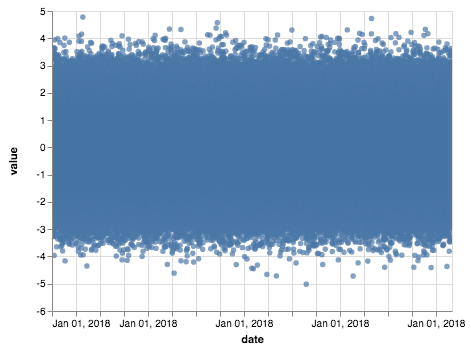

In [125]:
alt.Chart(random_df).mark_circle().encode(
    x='date',
    y='value'
).interactive()

Zooming and panning around this plot with 1 million points is not speedy but it is feasible with a fast laptop.